# Proyecto Security Data Science - Modelo de detección de vulnerabilidades y recomendación de contraseñas
### Integrantes:
- Sebastián Maldonado 18003
- Fernando Garavito 18071
- Jose Pablo Ponce 19092
- Rene Ventura 19554
- Gabriel Quiroz 19255

In [19]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

## Análisis exploratorio

In [2]:
data = pd.read_csv('data.csv', on_bad_lines='skip')

In [3]:
data = data.dropna()

In [4]:
df_final=data.drop_duplicates()

In [5]:
df_final.describe

<bound method NDFrame.describe of             password  strength
0           kzde5577         1
1           kino3434         1
2          visi7k1yr         1
3           megzy123         1
4        lamborghin1         1
...              ...       ...
669635    10redtux10         1
669636     infrared1         1
669637  184520socram         1
669638     marken22a         1
669639      fxx4pw4g         1

[669639 rows x 2 columns]>

In [6]:
data.head(5)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
print('weak:', len(data[data['strength']==0]))
print('medium:', len(data[data['strength']==1]))
print('strong:', len(data[data['strength']==2]))


weak: 89701
medium: 496801
strong: 83137


<AxesSubplot: xlabel='strength', ylabel='count'>

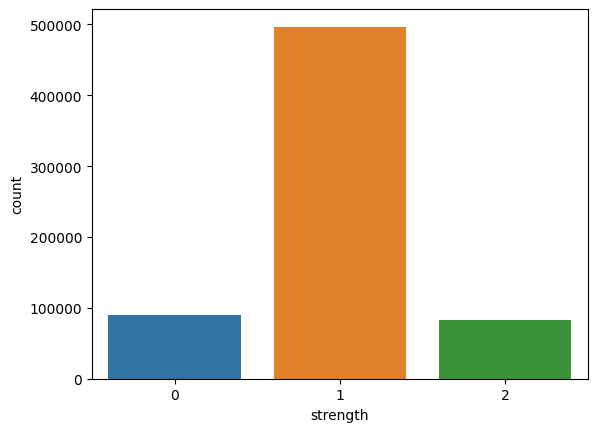

In [8]:
sns.countplot(x=data['strength'], data=data)

In [11]:
prof = ProfileReport(data)
prof.to_file(output_file='reporte.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Balanceo de datos

<AxesSubplot: >

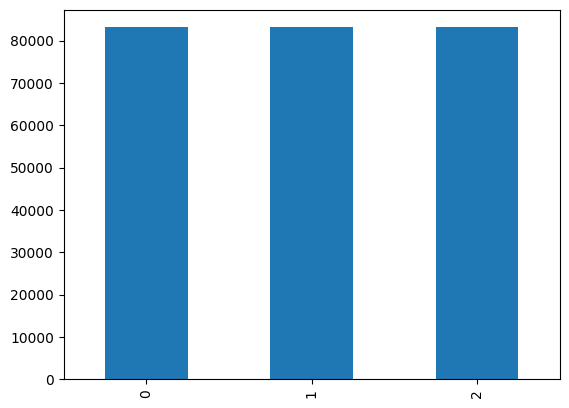

In [62]:
under_sampler = RandomUnderSampler(random_state=42)
X = np.array(data['password'])
y = np.array(data['strength'])
X, y = under_sampler.fit_resample(X.reshape(-1, 1), y)
new_df = pd.DataFrame()
new_df['password'] = X.T[0]
new_df['strength'] = y
new_df['strength'].value_counts().plot(kind='bar')

### Extracción de features

In [72]:
def count_digits(s):
    d = 0
    for c in s:
        if c.isdigit():
            d += 1
    return d
def count_lower(s):
    l = 0
    for c in s:
        if c.islower():
            l += 1
    return l
def count_upper(s):
    u = 0
    for c in s:
        if c.isupper():
            u += 1
    return u
def count_symbols(s):
    sym = 0
    for c in s:
        if not c.isupper() and not c.islower() and not c.isdigit():
            sym += 1
    return sym

In [87]:
new_df['length'] = new_df['password'].apply(len)
new_df['digits'] = new_df['password'].apply(count_digits)
new_df['lower'] = new_df['password'].apply(count_lower)
new_df['upper'] = new_df['password'].apply(count_upper)
new_df['symbols'] = new_df['password'].apply(count_symbols)
new_df.sample(10)

,password,strength,length,digits,lower,upper,symbols
110229,ailson0604,1,10,4,6,0,0
233174,Lquf31DAxOQaappG,2,16,2,8,6,0
157794,scl6655306,1,10,7,3,0,0
43226,EDUARD7,0,7,1,0,6,0
161263,jomblo84,1,8,2,6,0,0
102203,knopir1554,1,10,4,6,0,0
50290,alex26,0,6,2,4,0,0
242638,UzS7gZzUyOAy2PMf,2,16,2,6,8,0
28265,jo7777,0,6,4,2,0,0
160339,goten004,1,8,3,5,0,0
